# Installing packages

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install vaderSentiment
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data preproccessing

In [2]:
import pandas as pd

data = pd.read_csv("/Users/idahelenedencker/Desktop/STANDBY/all_files_final.csv")
data

,ID,file_name,main_post,name_abbreviation,offentlig_privat,date_post,n_post_day,week,group,intervention,...,has_comments,total_n_comments,n_total_reactions,count_like,count_heart,count_haha,count_care,count_angry,count_sad,count_wow
0,1601,YiYiP-3005-1_slut.json,1,YiYi,P,3005,1,5,control,no,...,0,0,25,22,3,0,0,0,0,0
1,1600,YiYiP-2905-1_slut.json,1,YiYi,P,2905,1,5,control,no,...,0,0,34,32,2,0,0,0,0,0
2,1599,YiYiP-2806-1_slut.json,1,YiYi,P,2806,1,9,control,no,...,1,1,31,29,2,0,0,0,0,0
3,1599,YiYiP-2806-1_slut.json,0,YiYi,P,2806,1,9,control,no,...,1,1,1,1,0,0,0,0,0,0
4,1598,YiYiP-2705-1_slut.json,1,YiYi,P,2705,1,4,control,no,...,0,0,11,11,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15461,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15462,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15463,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0


In [3]:
# count how many rows in the 'text' column that are empty 
nan_count = data["text"].isnull().sum()
print(nan_count)

15465 - nan_count

833


14632

In [4]:
#start by removing all rows where text is empty
data= data[data['text'].notna()]
data

,ID,file_name,main_post,name_abbreviation,offentlig_privat,date_post,n_post_day,week,group,intervention,...,has_comments,total_n_comments,n_total_reactions,count_like,count_heart,count_haha,count_care,count_angry,count_sad,count_wow
0,1601,YiYiP-3005-1_slut.json,1,YiYi,P,3005,1,5,control,no,...,0,0,25,22,3,0,0,0,0,0
1,1600,YiYiP-2905-1_slut.json,1,YiYi,P,2905,1,5,control,no,...,0,0,34,32,2,0,0,0,0,0
2,1599,YiYiP-2806-1_slut.json,1,YiYi,P,2806,1,9,control,no,...,1,1,31,29,2,0,0,0,0,0
4,1598,YiYiP-2705-1_slut.json,1,YiYi,P,2705,1,4,control,no,...,0,0,11,11,0,0,0,0,0,0
5,1597,YiYiP-2506-2_slut.json,1,YiYi,P,2506,2,8,control,no,...,1,1,32,23,0,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15461,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15462,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0
15463,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,1,8,1,1,0,0,0,0,0,0


In [5]:
# Make a new column 'n_comments_not_na' counting the number of rows for each unique 'ID'
#note that this row is not the same as total_n_comments since this referers to the count of all comments including the empty comments

data.loc[:,'n_comments_not_na']= ""

#iterate over unique values of 'ID'
for id_value in data['ID'].unique():

    #subset the dataframe for the current ID
    subset_df= data[data['ID']== id_value]

    #count the number of rows in subset_Df
    row_count = len(subset_df)

    #assign that number to n_comments_not_na in the subset_df
    subset_df.loc[:,'n_comments_not_na']= row_count

    #updata the original dataframe with the modified subset
    data.loc[data['ID']== id_value, 'n_comments_not_na']= row_count

data

/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_1529/2293095723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'n_comments_not_na']= ""


,ID,file_name,main_post,name_abbreviation,offentlig_privat,date_post,n_post_day,week,group,intervention,...,total_n_comments,n_total_reactions,count_like,count_heart,count_haha,count_care,count_angry,count_sad,count_wow,n_comments_not_na
0,1601,YiYiP-3005-1_slut.json,1,YiYi,P,3005,1,5,control,no,...,0,25,22,3,0,0,0,0,0,1
1,1600,YiYiP-2905-1_slut.json,1,YiYi,P,2905,1,5,control,no,...,0,34,32,2,0,0,0,0,0,1
2,1599,YiYiP-2806-1_slut.json,1,YiYi,P,2806,1,9,control,no,...,1,31,29,2,0,0,0,0,0,1
4,1598,YiYiP-2705-1_slut.json,1,YiYi,P,2705,1,4,control,no,...,0,11,11,0,0,0,0,0,0,1
5,1597,YiYiP-2506-2_slut.json,1,YiYi,P,2506,2,8,control,no,...,1,32,23,0,0,0,0,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,8,1,1,0,0,0,0,0,0,9
15461,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,8,1,1,0,0,0,0,0,0,9
15462,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,8,1,1,0,0,0,0,0,0,9
15463,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,treatment,no,...,8,1,1,0,0,0,0,0,0,9


In [6]:
#make unique Id for each row in the new preproccessed df

#reset index starting from 1
data.reset_index(drop=False, inplace=True)

#add 1 the the index to start from 1 and not 0
data['unique_ID']= data.index+1

#reorder the columns so unique_ID comes first
data= data[['unique_ID'] + [col for col in data.columns if col!= 'unique_ID']]
data

/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/ipykernel_1529/3861494573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_ID']= data.index+1


,unique_ID,index,ID,file_name,main_post,name_abbreviation,offentlig_privat,date_post,n_post_day,week,...,total_n_comments,n_total_reactions,count_like,count_heart,count_haha,count_care,count_angry,count_sad,count_wow,n_comments_not_na
0,1,0,1601,YiYiP-3005-1_slut.json,1,YiYi,P,3005,1,5,...,0,25,22,3,0,0,0,0,0,1
1,2,1,1600,YiYiP-2905-1_slut.json,1,YiYi,P,2905,1,5,...,0,34,32,2,0,0,0,0,0,1
2,3,2,1599,YiYiP-2806-1_slut.json,1,YiYi,P,2806,1,9,...,1,31,29,2,0,0,0,0,0,1
3,4,4,1598,YiYiP-2705-1_slut.json,1,YiYi,P,2705,1,4,...,0,11,11,0,0,0,0,0,0,1
4,5,5,1597,YiYiP-2506-2_slut.json,1,YiYi,P,2506,2,8,...,1,32,23,0,0,0,0,9,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,14628,15460,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,...,8,1,1,0,0,0,0,0,0,9
14628,14629,15461,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,...,8,1,1,0,0,0,0,0,0,9
14629,14630,15462,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,...,8,1,1,0,0,0,0,0,0,9
14630,14631,15463,1,AaPeO-0105-1_slut.json,0,AaPe,O,105,1,1,...,8,1,1,0,0,0,0,0,0,9


# Doing different sentiment analysis on the comments (NLP)

## Translated VADER sentiment model (simple model)



Vader takes each word as neg, pos or neutral and provides sentiment scores based on the words used as well as a compound score of wheter a senence leans in the direction of positive, neutral or negative (between -1 and 1). Note that the model does not understand realations between words, e.g. negation.

The vader model is trained on mostly english data and does not work so well for other languages, therefore the comments are translated to english prior to using the model


Code is from: https://medium.com/@NimashaBandara/using-vader-and-google-translator-to-perform-multi-language-sentiment-analysis-53cfdd18340d 

In [109]:
!pip install googletrans==3.1.0.a0
!pip install vaderSentiment

In [116]:
from tqdm import tqdm 
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

translator = Translator()
sentimentAnalyzer = SentimentIntensityAnalyzer()

res ={}
for i, row in tqdm(data.iterrows(), total = len(data)):
        text = row['text']
        myid = row['unique_ID']
        result = translator.translate(text)
        res[myid]= sentimentAnalyzer.polarity_scores(result.text)


vaders_data= pd.DataFrame(res).T
vaders_data = vaders_data.reset_index().rename(columns= {'index': 'unique_ID'})
vaders_data= vaders_data.merge(data, how='left')

#rename the column to include 'vader' 
vaders_data.rename(columns={'neg': 'neg_vader', 'pos': 'pos_vader', 'neu': 'neu_vader', 'compound': 'compound_vader'}, inplace=True)

#Save dataframe that now has 1 type of sentiment score: vaders 
vaders_data.to_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/1_types_sen.csv', index = False)


  0%|          | 0/14632 [00:00<?, ?it/s]

## ROBERTA multilangauge sentiment model (transformer based)

Roberta is a model trained on a large corpus of data. Its transformer-based model architechture accounts for the words but also the context relatex to other words

In [2]:
%pip install tensorflow
%pip install torch
%pip install pytorch
%pip install tf-keras
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/ds/0d9wxy210kx_fvknqn3hcg_h0000gn/T/pip-install-h7xfun7t/pytorch_8d0c420dd693483b8df4f10363a029cd/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed t

In [2]:
#only if below chunck is giving error:
#%pip install sentencepiece
#reload page 

Defaulting to user installation because normal site-packages is not writeable
  Using cached sentencepiece-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
Using cached sentencepiece-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from tqdm import tqdm 
import pandas as pd
from transformers import pipeline

#Roberta for the full dataset (that allready has vader scores)

#load in the data that allready has the vaders scores
one_type_sen = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/1_types_sen.csv')

#delete first column, Unnamed:0
one_type_sen.drop(columns=one_type_sen.columns[0], axis=1, inplace=True)
#obs note that multivader broke for some rows so unique_ID is higher than the number of rows

#define model
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model = model_path, tokenizer=model_path, return_all_scores= True, max_length= 512, truncation =True)

text= [str(i) for i in one_type_sen['text'].tolist()]

#initialize list to store empty emotion scores 
emotion_scores= []

#iterate over text with tqdm progress bar
for single_text in tqdm(text, desc = "Extracting emotion scores"):
    score = sentiment_task(single_text)
    emotion_scores.append(score)

#initialize lists to store scores
positive_scores = []
negative_scores = []
neutral_scores = []

#iterate over emotion_scores
for score in emotion_scores:
    #initialize score variables
    pos_score= 0
    neg_score = 0
    neu_score = 0
    #Iterate over each label and score 
    for item in score[0]:
        if item['label']== 'positive': #change to positive and run again :))
            pos_score= item['score']
        if item['label']== 'negative':
            neg_score= item['score']
        if item['label']== 'neutral':
            neu_score= item['score']

    positive_scores.append(pos_score)
    negative_scores.append(neg_score)
    neutral_scores.append(neu_score)

one_type_sen['pos_score_roberta']= positive_scores
one_type_sen['neg_score_roberta']= negative_scores
one_type_sen['neu_score_roberta']= neutral_scores


#calculate a compound score (see https://medium.com/berylls-digital-ventures/sentiment-analysis-using-snscrape-and-roberta-be6e48c0d208 for inspo)
def calculate_compound_score(row):
    return (row['neg_score_roberta'] * -1) + (row['neu_score_roberta'] * 0) + (row['pos_score_roberta'] * 1)
# Apply function to each row and create 'compound' column
one_type_sen['compound_roberta'] = one_type_sen.apply(calculate_compound_score, axis=1)


#assign roberta_label based on what score of neg, pos or neu is the highest 
def determine_label(row):
    max_value = max(row['neg_score_roberta'], row['neu_score_roberta'], row['pos_score_roberta'])
    if max_value == row['neg_score_roberta']:
        return 'neg'
    elif max_value == row['neu_score_roberta']:
        return 'neu'
    else:
        return 'pos'

# Apply function to each row and create 'roberta_label' column
one_type_sen['roberta_label'] = one_type_sen.apply(determine_label, axis=1)


#Save dataframe that now has 2 types of sentiment score: vaders and roberta
one_type_sen.to_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/2_types_sen.csv', index = False)
#took 11 min 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
Extracting emotion scores: 100%|██████████| 14632/14632 [11:10<00:00, 21.82it/s]


In [6]:
#can check min, max and mean for columns 
one_type_sen['neg_score_roberta'].max()

0.9648450613021851

## Danish BERT emotion label model

In [7]:
%pip install danlp
%pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


returns: glæde/sindsro, forventning/interesse, tillid/accept, overraskelse/forundring, vrede/irritation, foragt/modvilje, sorg/skuffelse, frygt/bekymring, No emotion

see https://github.com/alexandrainst/danlp/blob/master/docs/docs/tasks/sentiment_analysis.md#bert-emotion

In [8]:
from danlp.models import load_bert_emotion_model
classifier = load_bert_emotion_model()

# using the classifier
classifier.predict('der er et grimt træ i haven')

You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


'Foragt/Modvilje'

In [9]:
#read in data that has both vaders and roberta 
two_type_sen = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/2_types_sen.csv')

#load classifier
from danlp.models import load_bert_emotion_model
classifier = load_bert_emotion_model()

text= [str(i) for i in two_type_sen['text'].tolist()]

#initialize list to store empty emotion scores 
dan_bert_labels= []
#iterate over text with tqdm progress bar
for single_text in tqdm(text, desc = "Extracting danish bert emotion label"):
    score = classifier.predict(single_text)
    dan_bert_labels.append(score)


# Append bert_scores to the dataframe
two_type_sen['bert_emotion_label'] = dan_bert_labels

#Save dataframe that now has 3 types of sentiment score: vaders, roberta and danish bert
two_type_sen.to_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/3_types_sen.csv', index=False)

You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=8` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
Extracting danish bert emotion label:   1%| | 110/14632 [00:07<11:59, 20.19it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/danlp/models/bert_models.py:180: UserWarning: Maximum length for sequence exceeded, truncation may result in unexpected results. Consider running the model on a shorter sequenze then 512 tokens
  warnings.warn('Maximum length for sequence exceeded, truncation may result in unexpected results. Consider running the model on a shorter sequenze then {} tokens'.format(max_lenght))
Extracting danish bert emotion label: 100%|█| 14632/14632 [21:25<00:00, 11.38it/


In [10]:
#check some examples for the different categories 

tillid_accept= two_type_sen[two_type_sen['bert_emotion_label'] == 'Tillid/Accept']
print(tillid_accept['text'][:100])


foragt_modvilje= two_type_sen[two_type_sen['bert_emotion_label'] == 'Foragt/Modvilje']
print(foragt_modvilje['text'][:100])

73     Hej Doris\nDet kunne selvfølgelig være alletid...
89       Enig, Hans - vi arbejder på en opsparings-model
103                            Piroz be. Mala we awa be.
133                                           Godt gået!
134                                  Kanon vigtig aftale
                             ...                        
328                                          God bedring
329                                          God bedring
331                                Øv rigtig god bedring
335                                          God bedring
338                         Aø, god bedring søde Yildiz.
Name: text, Length: 100, dtype: object
14                                          Ma bi xêr be
37     Pîroz be û bi hêvîya şad û bextewarîyê bila he...
80     Da Det Osmanniske Rige gik i opløsning efter 1...
82     6 Ezidi-piger, der i sommeren 2014 blev kidnap...
84                              Provokasyonên li Şingalê
                             ...                 

## Rec-nition and A-ttack algorithm from Analyse og tal 

The rec-nition algorithm is designed to classify small text pieces based on whether they contain appreciative language or not. <br>
It is developed by Analyse og Tal F.M.B.A. with support from TryghedsFonden.
Read more [here](https://github.com/ogtal/rec-nition)


The A-ttack algorithm is desgined to classify small text pieces based on whether they contain a 'sprogligt angreb' or not. <br>
It is developed by Analyse og Tal F.M.B.A. with support from TryghedsFonden. Read more [here](https://github.com/ogtal/A-ttack)

In [11]:
%pip install torch
%pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


### Apply rec-nition model

In [12]:
from tqdm import tqdm 
import numpy as np

#apply algorithm to the data that allready has vader, roberta, and danish bert

#load in the data that allready has 3 senitment types
three_type_sen = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/3_types_sen.csv')

#change wd
import os
os.chdir('/Users/idahelenedencker/Desktop/STANDBY/Scripts/Rec-nition')

#print whats in wd to check 
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)

#add rec-nition model to ‘text’ column: produces binary class: anderkendende/ikke-anerkendende:
# 0 = ikke-anerkendende 
# 1 = anerkendende
import torch
from transformers import AutoTokenizer
from model_def import ElectraClassifier


def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint,2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict = False)
    model.eval()
    return(model, tokenizer)

def make_prediction(text):
    tokenized_text = tokenizer(
        text,
        truncation=True,
        max_length=512,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt',
    )
    input_ids = tokenized_text['input_ids']
    attention_masks = tokenized_text['attention_mask']
    logits = model(input_ids,attention_masks)
    
    logit,preds = torch.max(logits, dim=1)
    return(int(preds))

model, tokenizer = load_model()

#make text into list
text= [str(i) for i in three_type_sen['text'].tolist()]

#initialize list to store labels
recnit_scores= []

#iterate over text with tqdm progress bar
for single_text in tqdm(text, desc = "Extracting rec-nition scores"):
    label = make_prediction(single_text)
    recnit_scores.append(label)

three_type_sen['rec-nition'] = np.array(recnit_scores)

#Save dataframe that now has 4 types of sentiment score: vaders, roberta, danish bert and rec-nition
three_type_sen.to_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/4_types_sen.csv', index = False)

#took 12 min 


Contents of the Working Directory:
LICENSE.md
model_def.py
definitioner.pdf
__pycache__
README.md
data_prep.py
pytorch_model.bin
.ipynb_checkpoints


Extracting rec-nition scores: 100%|███████| 14632/14632 [12:34<00:00, 19.40it/s]


### Apply A-ttack model

In [17]:
from tqdm import tqdm 
import numpy as np

#apply algorithm to the data that allready has rec-nition, vader, roberta, and danish bert

#load in the data that allready has 4 sentiment types
four_type_sen = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/4_types_sen.csv')

#change wd
import os
os.chdir('/Users/idahelenedencker/Desktop/STANDBY/Scripts/A-ttack')

#print whats in wd to check 
contents = os.listdir(os.getcwd())
print("Contents of the Working Directory:")
for item in contents:
    print(item)


#add attack model to ‘text’ column: produces binary class: sprogligt angreb/ikke sprogligt angreb:
# 0 = ikke sprogligt angreb
# 1 = sprogligt angreb
import torch
from transformers import AutoTokenizer
from model_def import ElectraClassifier


def load_model():
    model_checkpoint = 'Maltehb/aelaectra-danish-electra-small-cased'
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
    model = ElectraClassifier(model_checkpoint,2)
    model_path = 'pytorch_model.bin'
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')), strict = False)
    model.eval()
    return(model, tokenizer)

def make_prediction(text):
    tokenized_text = tokenizer(
        text,
        truncation=True,
        max_length=512,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt',
    )
    input_ids = tokenized_text['input_ids']
    attention_masks = tokenized_text['attention_mask']
    logits = model(input_ids,attention_masks)
    
    logit,preds = torch.max(logits, dim=1)
    return(int(preds))

model, tokenizer = load_model()

#make text into list
text= [str(i) for i in four_type_sen['text'].tolist()]

#initialize list to store labels
attack_scores= []

#iterate over text with tqdm progress bar
for single_text in tqdm(text, desc = "Extracting attack scores"):
    label = make_prediction(single_text)
    attack_scores.append(label)

four_type_sen['attack'] = np.array(attack_scores)

#Save dataframe that now has 5 types of sentiment score: vaders, roberta, danish bert, rec-nition and attack
four_type_sen.to_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/5_types_sen.csv', index = False)

#took 13 min 


Contents of the Working Directory:
LICENSE.md
.DS_Store
requirements.txt
model_def.py
definitioner.pdf
__pycache__
README.md
data_prep.py
pytorch_model.bin
.ipynb_checkpoints
.git


Extracting attack scores: 100%|███████████| 14632/14632 [11:35<00:00, 21.03it/s]


# Multilevel modelling (predictive modellling)

contrast: intervention across all posts (i.e. comparing posts that have the intervention to posts that dont have the intervention) - obviously we need to be careful here about the nestedness of these observations (posts nested in politicians and potentionally politicians nested in kommuner - but probably our data isnt suffucient for such model to converge)

To account for nestedness, do random and fixed effects on e.g 'politician', 'kommune' 

# Machine learning 

Can we train a model to predict sentiment based on predictors like municipality 

# Visualisations

In [18]:
%pip install matplotlib
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [19]:
#read in data with the sentiment scores 
data_w_sentiment = pd.read_csv('/Users/idahelenedencker/Desktop/STANDBY/Sentiment CSV files/5_types_sen.csv')

#reduce the data to only include posts that has comments and exclude the main post, so we only have the facebook comments
reduced = data_w_sentiment[data_w_sentiment['has_comments'] != 0]
reduced = data_w_sentiment[data_w_sentiment['main_post'] == 0]

### Count Plots

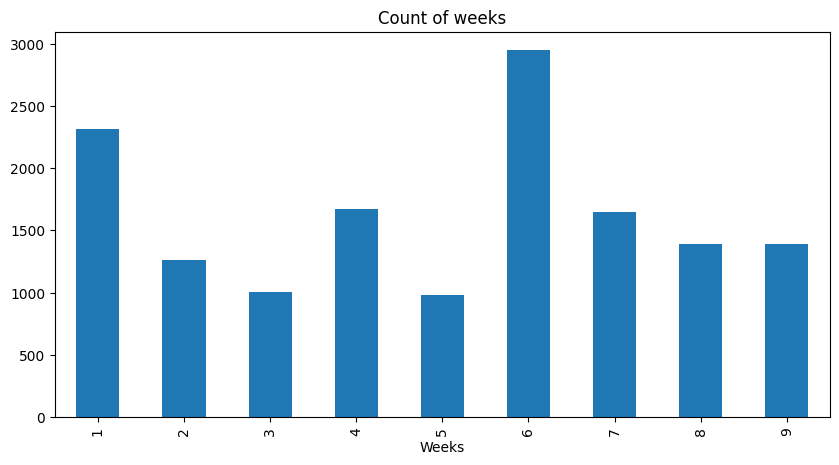

In [20]:
#simple count plotting of weeks 

ax = data_w_sentiment['week'].value_counts().sort_index() \
    .plot(kind= 'bar',
    title= 'Count of weeks',
    figsize= (10,5))
ax.set_xlabel('Weeks')
plt.show()

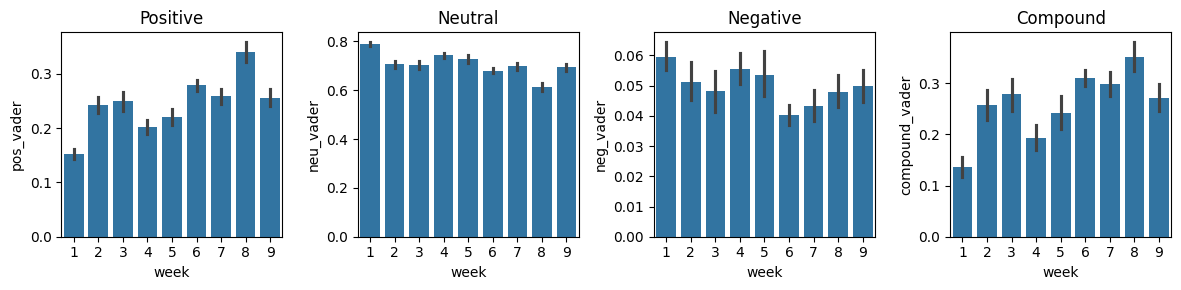

In [21]:
#the multivader scores by week

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=reduced, x='week', y='pos_vader', ax=axs[0])
sns.barplot(data=reduced, x='week', y='neu_vader', ax=axs[1])
sns.barplot(data=reduced, x='week', y='neg_vader', ax=axs[2])
sns.barplot(data=reduced, x='week', y='compound_vader', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

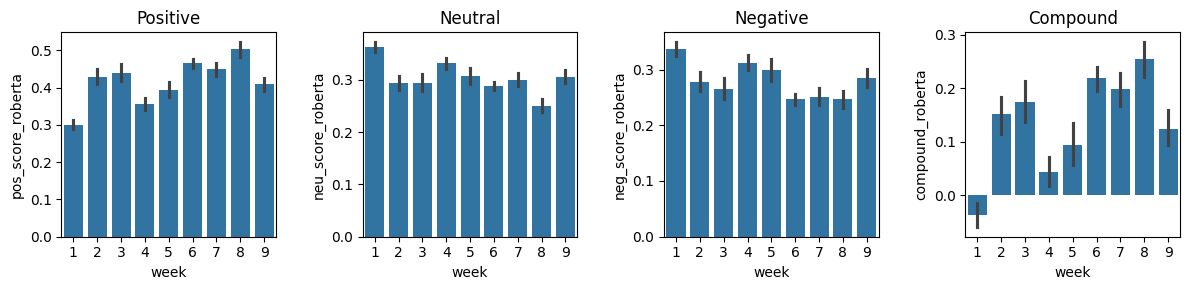

In [22]:
#the roberta scores by week

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=reduced, x='week', y='pos_score_roberta', ax=axs[0])
sns.barplot(data=reduced, x='week', y='neu_score_roberta', ax=axs[1])
sns.barplot(data=reduced, x='week', y='neg_score_roberta', ax=axs[2])
sns.barplot(data=reduced, x='week', y='compound_roberta', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

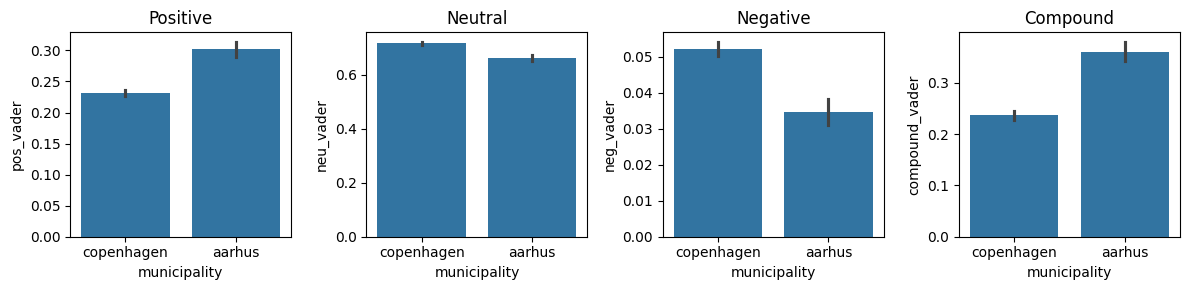

In [23]:
#visualize the multivader scores by municipality 

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=reduced, x='municipality', y='pos_vader', ax=axs[0])
sns.barplot(data=reduced, x='municipality', y='neu_vader', ax=axs[1])
sns.barplot(data=reduced, x='municipality', y='neg_vader', ax=axs[2])
sns.barplot(data=reduced, x='municipality', y='compound_vader', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

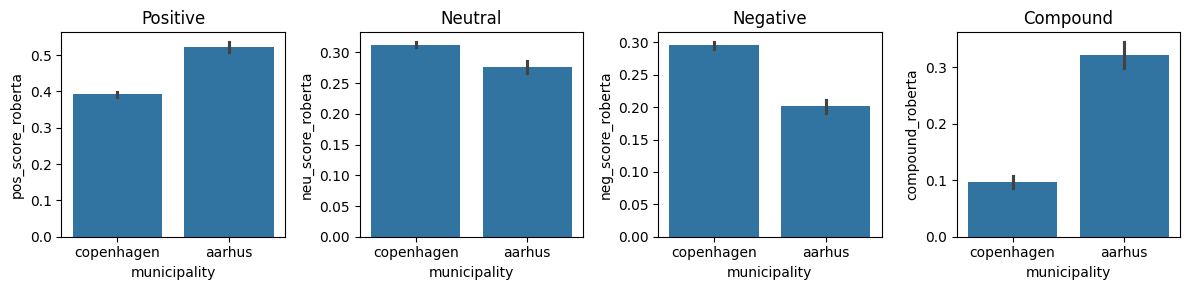

In [24]:
#visualize the roberta scores by municipality 

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=reduced, x='municipality', y='pos_score_roberta', ax=axs[0])
sns.barplot(data=reduced, x='municipality', y='neu_score_roberta', ax=axs[1])
sns.barplot(data=reduced, x='municipality', y='neg_score_roberta', ax=axs[2])
sns.barplot(data=reduced, x='municipality', y='compound_roberta', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

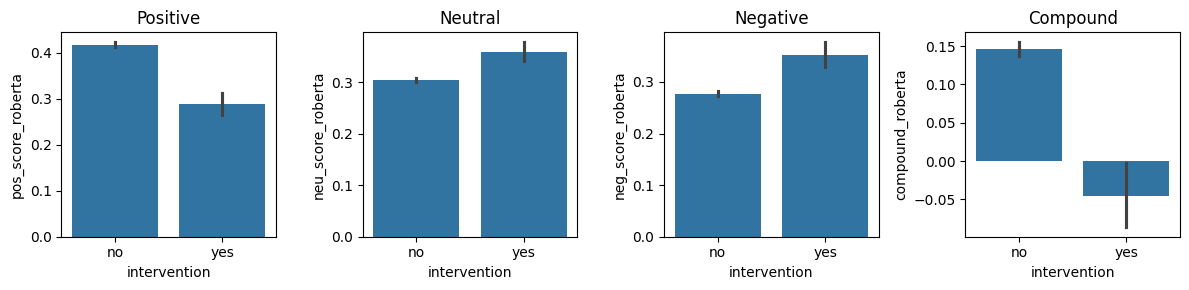

In [25]:
# visualising the treatment effect
#column 'intervention' has yes or no

#visualize the roberta scores by intervention 

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=reduced, x='intervention', y='pos_score_roberta', ax=axs[0])
sns.barplot(data=reduced, x='intervention', y='neu_score_roberta', ax=axs[1])
sns.barplot(data=reduced, x='intervention', y='neg_score_roberta', ax=axs[2])
sns.barplot(data=data_w_sentiment, x='intervention', y='compound_roberta', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

In [26]:
#calculate mean for roberta pos grouped by intervention

#treatment data 
treatment = reduced[reduced['intervention'] == 'yes']
control= reduced[reduced['intervention'] == 'no']

print("treatment mean:",treatment.loc[:, 'pos_score_roberta'].mean(), "control mean:", control.loc[:, 'pos_score_roberta'].mean())

#the mean of positive is actually lower for treatment, i.e. treatment post has less positive comments

treatment mean: 0.2886197643872571 control mean: 0.4180904249956393


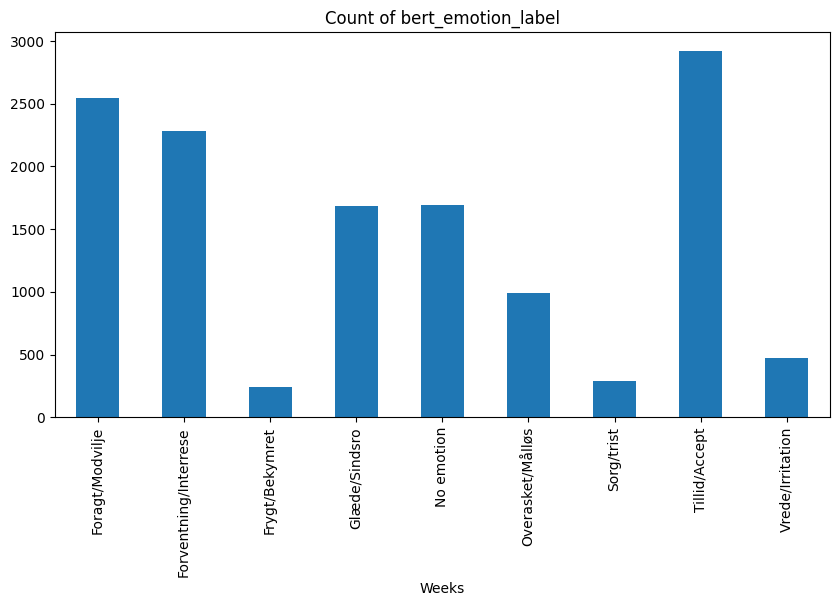

In [27]:
#plot bert_emotion_label counts

ax = reduced['bert_emotion_label'].value_counts().sort_index() \
    .plot(kind= 'bar',
    title= 'Count of bert_emotion_label',
    figsize= (10,5))
ax.set_xlabel('Weeks')
plt.show()

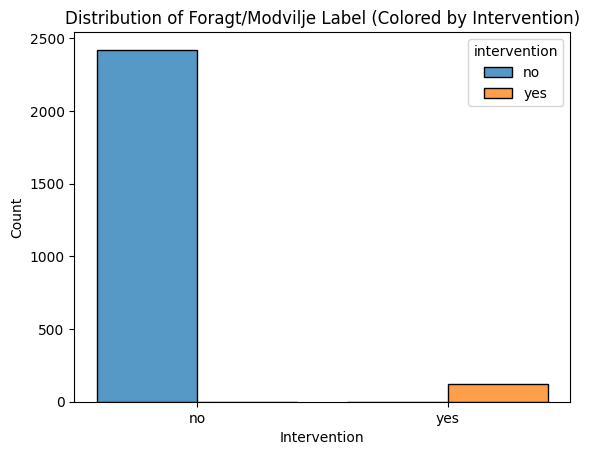

In [28]:
#Distribution of Foragt/Modvilje Label (Colored by Intervention)

# Filter the DataFrame for the 'Foragt/Modvilje' label
foragt_modvilje = reduced[reduced['bert_emotion_label'] == 'Foragt/Modvilje']

# Plot the distribution of 'Foragt/Modvilje' label colored by the 'intervention' column
sns.histplot(data=foragt_modvilje, x='intervention', hue='intervention', multiple='dodge', stat='count', shrink=0.8)

# Add labels to the plot
plt.xlabel('Intervention')
plt.ylabel('Count')
plt.title('Distribution of Foragt/Modvilje Label (Colored by Intervention)')

plt.show()

### Distribution plots

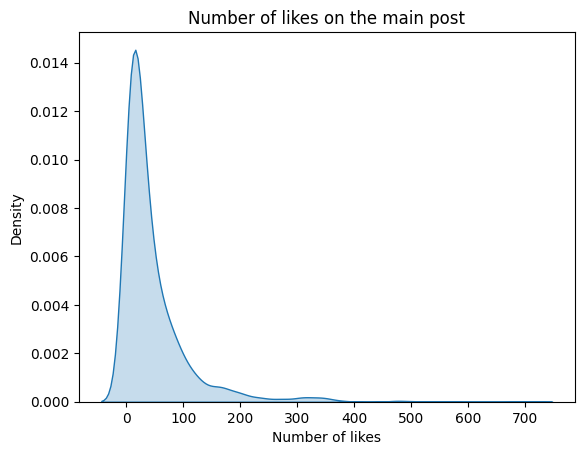

45.826797385620914

In [29]:
#plot of likes for the main post 

mainpost_df = data_w_sentiment.query('main_post == 1')

sns.kdeplot(data=mainpost_df, x='count_like', fill=True)

# Add labels to the plot
plt.xlabel('Number of likes')
plt.ylabel('Density')
plt.title('Number of likes on the main post')

plt.show()

mainpost_df.loc[:, 'count_like'].mean()

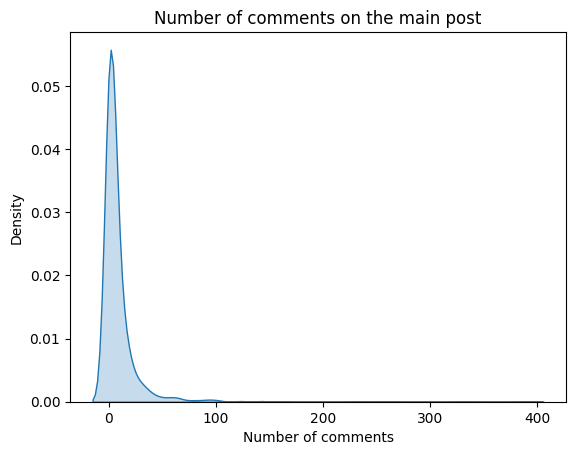

8.601960784313725

In [30]:
#plot of n_comments for the main post 

mainpost_df = data_w_sentiment.query('main_post == 1')

sns.kdeplot(data=mainpost_df, x='total_n_comments', fill=True)

# Add labels to the plot
plt.xlabel('Number of comments')
plt.ylabel('Density')
plt.title('Number of comments on the main post')

plt.show()

mainpost_df.loc[:, 'total_n_comments'].mean()


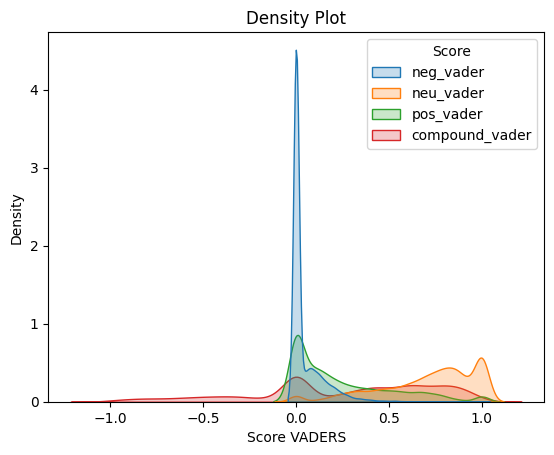

In [31]:
#density plot of the vaders scores

# Melt the DataFrame to have scores in one column and their corresponding types in another
melted_df = pd.melt(reduced, value_vars=['neg_vader', 'neu_vader', 'pos_vader', 'compound_vader'], var_name='Score')

# Plot a density plot
sns.kdeplot(data=melted_df, x='value', hue='Score', fill=True)

# Add labels to the plot
plt.xlabel('Score VADERS')
plt.ylabel('Density')
plt.title('Density Plot')

plt.show()


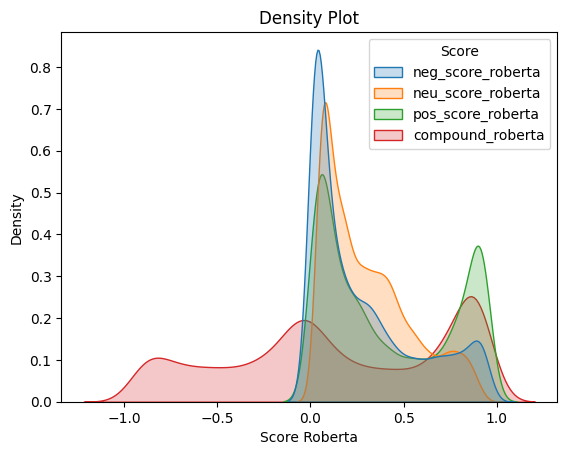

In [32]:
#density plot of the roberta scores

# Melt the DataFrame to have scores in one column and their corresponding types in another
melted_df = pd.melt(reduced, value_vars=['neg_score_roberta', 'neu_score_roberta', 'pos_score_roberta', 'compound_roberta'], var_name='Score')

# Plot a density plot
sns.kdeplot(data=melted_df, x='value', hue='Score', fill=True)

# Add labels to the plot
plt.xlabel('Score Roberta')
plt.ylabel('Density')
plt.title('Density Plot')

plt.show()

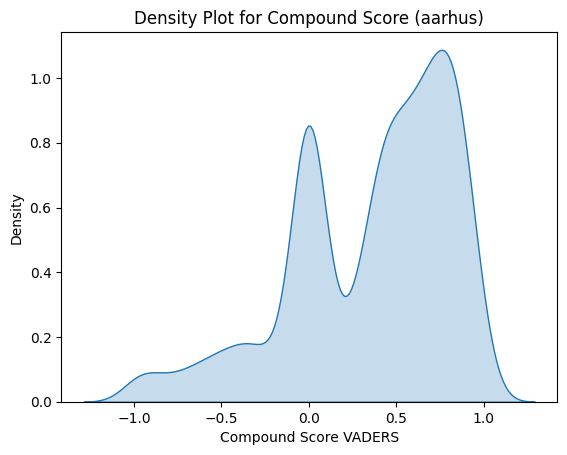

In [33]:
#density plot of the vaders compound, only for århus
aarhus_df = reduced.query('municipality == "aarhus"')

# Plot a density plot for the 'compound' score colored by the 'municipality' column
sns.kdeplot(data=aarhus_df, x='compound_vader', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score VADERS')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (aarhus)')

plt.show()

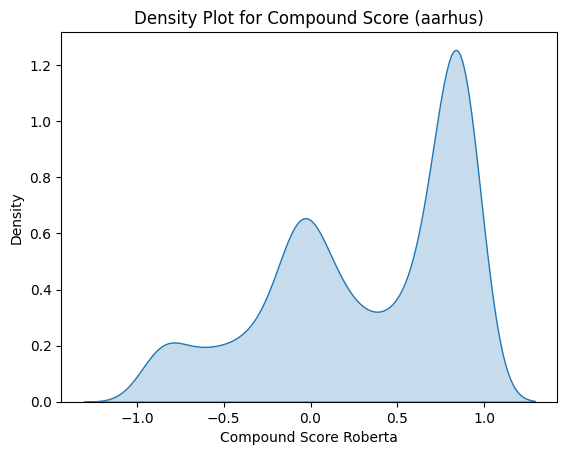

In [34]:
#density plot of the roberta compound, only for århus
aarhus_df = reduced.query('municipality == "aarhus"')

# Plot a density plot for the 'compound' score colored by the 'municipality' column
sns.kdeplot(data=aarhus_df, x='compound_roberta', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score Roberta')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (aarhus)')

plt.show()

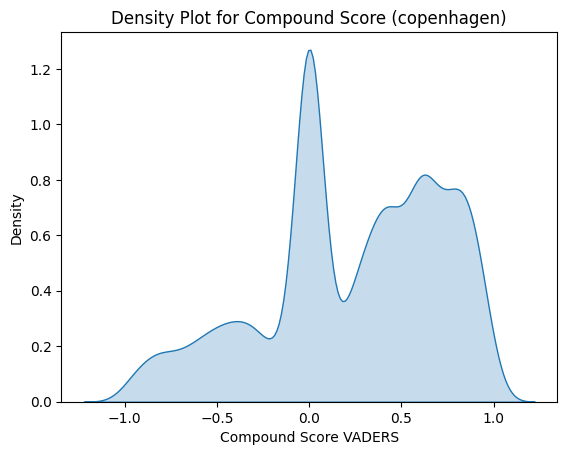

In [35]:
#density plot of the vaders compound, only for copenhagen
copenhagen_df = reduced.query('municipality == "copenhagen"')

# Plot a density plot for the 'compound' score colored by the 'municipality' column
sns.kdeplot(data=copenhagen_df, x='compound_vader', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score VADERS')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (copenhagen)')

plt.show()

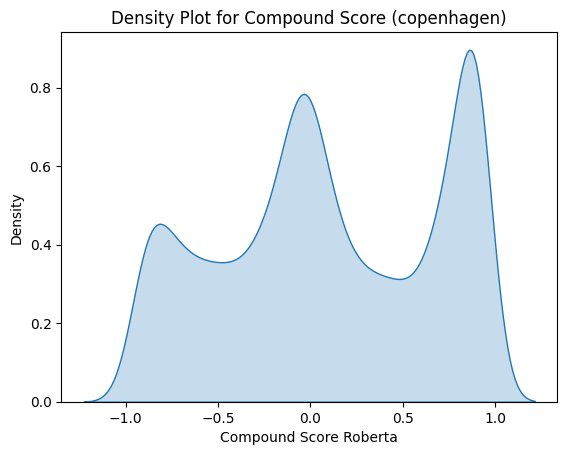

In [36]:
#density plot of the roberta compound, only for copenhagen
copenhagen_df = reduced.query('municipality == "copenhagen"')

# Plot a density plot for the 'compound' score colored by the 'municipality' column
sns.kdeplot(data=copenhagen_df, x='compound_roberta', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score Roberta')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (copenhagen)')

plt.show()

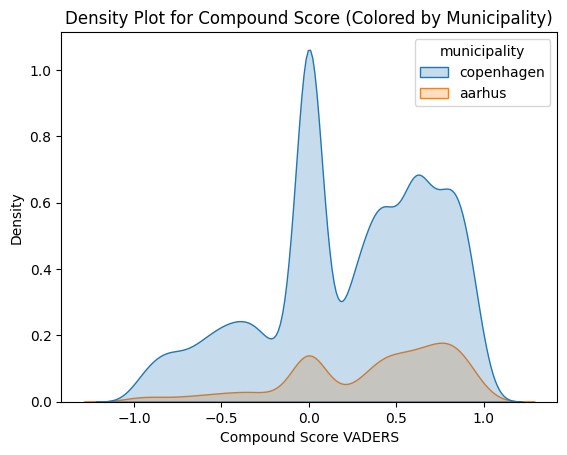

In [37]:
# density plot of the vaders compound, colored by the 'municipality' column
sns.kdeplot(data=reduced, x='compound_vader', hue='municipality', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score VADERS')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (Colored by Municipality)')

plt.show()

Looking at the plot, interesting patterns occour. Overall the comments on aarhus politicians are mostly 'positve' and very few are negative.

That pattern is not present for copenhagen. Here most comments are neutral and more comments are negative than in 'aarhus comments'

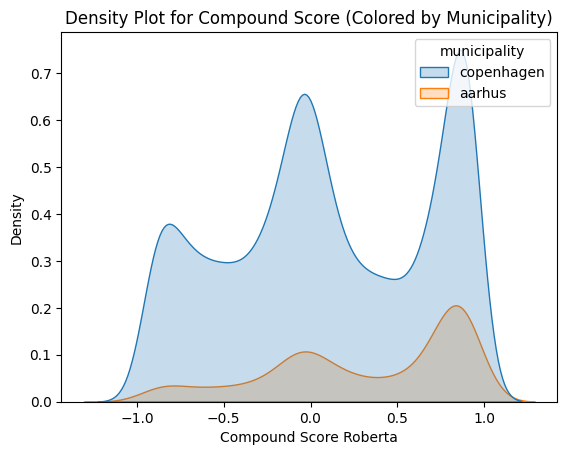

In [38]:
# density plot of the roberta compound, colored by the 'municipality' column
sns.kdeplot(data=reduced, x='compound_roberta', hue='municipality', fill=True)

# Add labels to the plot
plt.xlabel('Compound Score Roberta')
plt.ylabel('Density')
plt.title('Density Plot for Compound Score (Colored by Municipality)')

plt.show()

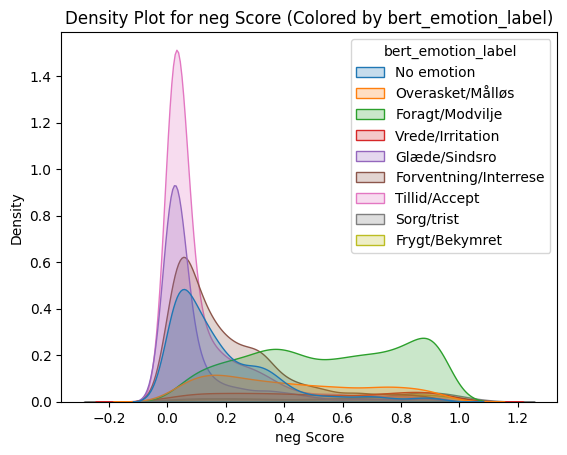

In [39]:
#density plot for the roberta neg colored by bert_emotion_label

sns.kdeplot(data=reduced, x='neg_score_roberta', hue='bert_emotion_label', fill=True)

# Add labels to the plot
plt.xlabel('neg Score')
plt.ylabel('Density')
plt.title('Density Plot for neg Score (Colored by bert_emotion_label)')

plt.show()

#make sense, the highest neg scores are associated with 'foragt/modvilje'

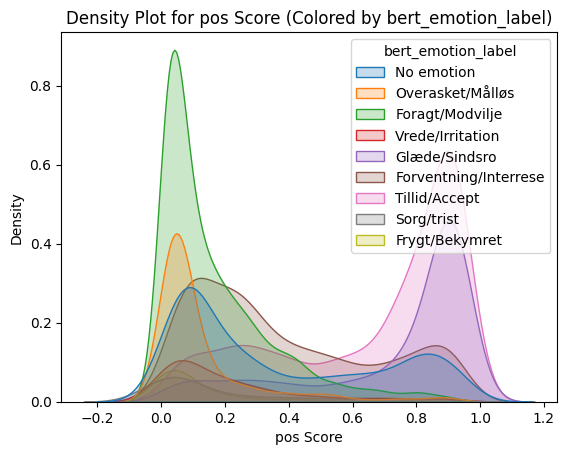

In [40]:
#density plot for the roberta pos colored by bert_emotion_label

sns.kdeplot(data=reduced, x='pos_score_roberta', hue='bert_emotion_label', fill=True)

# Add labels to the plot
plt.xlabel('pos Score')
plt.ylabel('Density')
plt.title('Density Plot for pos Score (Colored by bert_emotion_label)')

plt.show()

#make sense, the highest pos scores are associated with 'tillid/accept' and 'glæde/sindsro'

### Pie charts

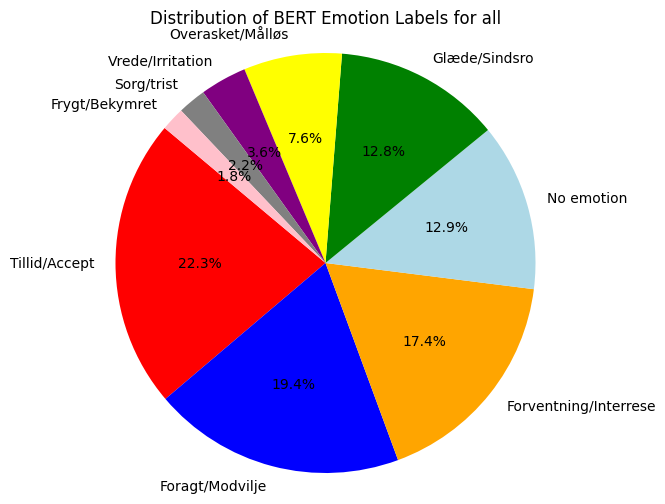

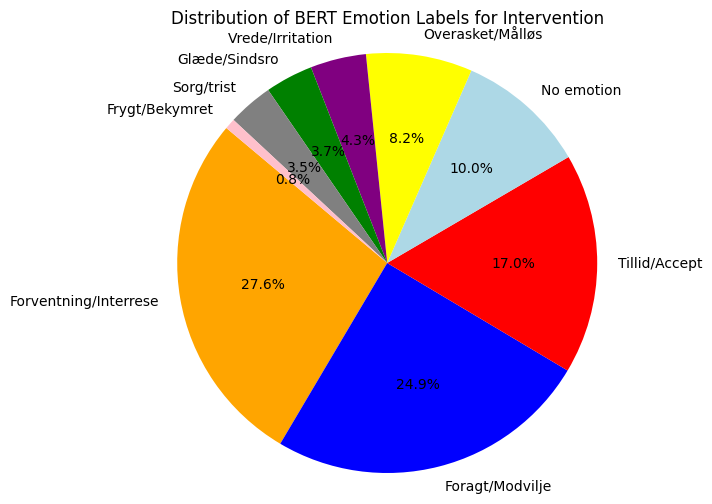

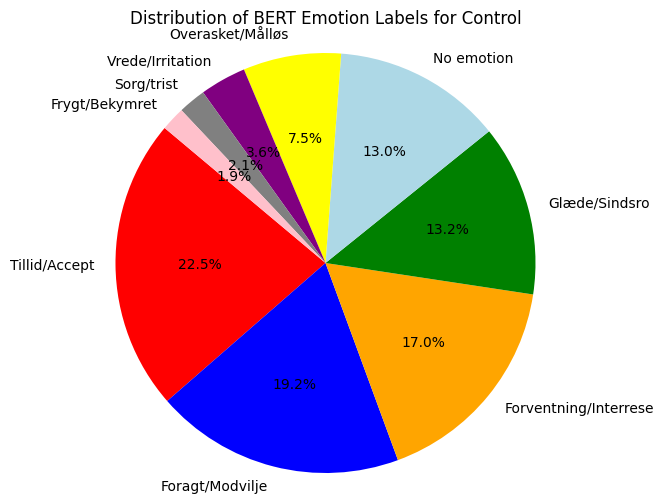

In [41]:
#pie charts of bert_emotion_label (for all, for intervention, for control)

label_counts = reduced['bert_emotion_label'].value_counts()

reduced_treat = reduced[reduced['intervention'] == 'yes']
label_counts_int = reduced_treat['bert_emotion_label'].value_counts()

reduced_cont = reduced[reduced['intervention'] == 'no']
label_counts_cont = reduced_cont['bert_emotion_label'].value_counts()



# Define a color map for emotion categories
color_map = {
    'Foragt/Modvilje': 'blue',
    'Forventning/Interrese': 'orange',
    'Glæde/Sindsro': 'green',
    'Tillid/Accept': 'red',
    'No emotion': 'lightblue',
    'Frygt/Bekymret': 'pink',
    'Sorg/trist': 'grey',
    'Vrede/Irritation': 'purple',
    'Overasket/Målløs': 'yellow',
    # Add more emotion categories and their corresponding colors if needed
}


# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of BERT Emotion Labels for all')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Plotting the pie chart for intervention
plt.figure(figsize=(8, 6))
plt.pie(label_counts_int, labels=label_counts_int.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_int.index])
plt.title('Distribution of BERT Emotion Labels for Intervention')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plotting the pie chart for control
plt.figure(figsize=(8, 6))
plt.pie(label_counts_cont, labels=label_counts_cont.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_cont.index])
plt.title('Distribution of BERT Emotion Labels for Control')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



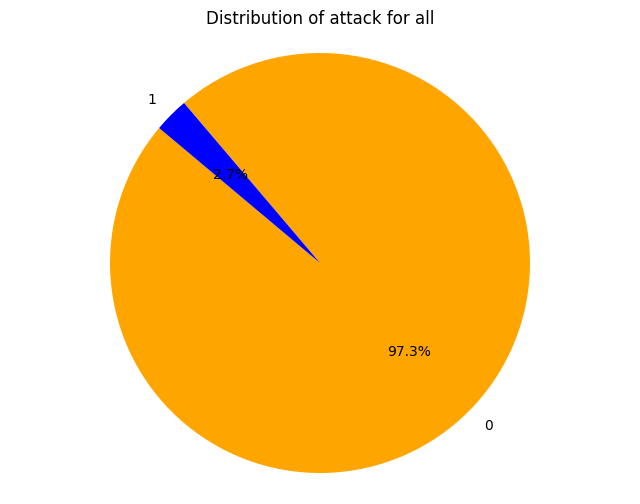

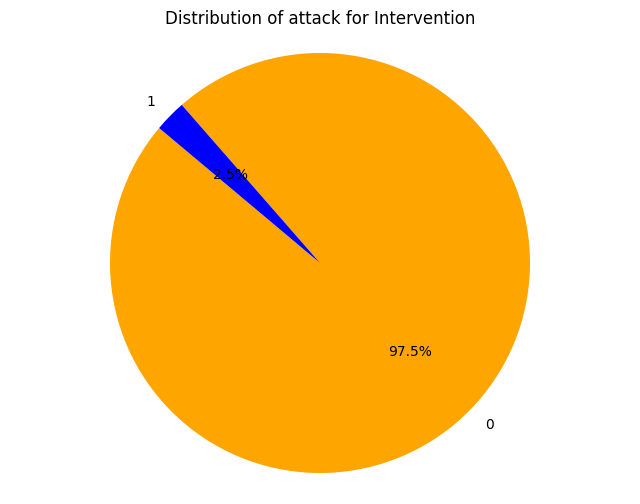

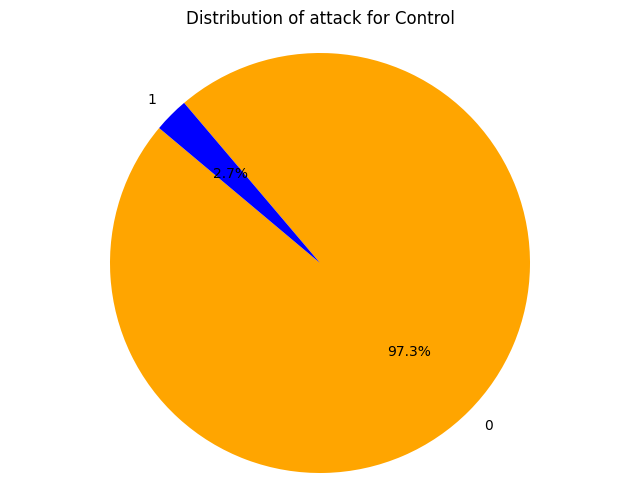

In [44]:
#pie charts of attack (for all, for intervention, for control)

label_counts = reduced['attack'].value_counts()

reduced_treat = reduced[reduced['intervention'] == 'yes']
label_counts_int = reduced_treat['attack'].value_counts()

reduced_cont = reduced[reduced['intervention'] == 'no']
label_counts_cont = reduced_cont['attack'].value_counts()



# Define a color map for emotion categories
color_map = {
    1: 'blue',
    0: 'orange'
}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of attack for all')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Plotting the pie chart for intervention
plt.figure(figsize=(8, 6))
plt.pie(label_counts_int, labels=label_counts_int.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_int.index])
plt.title('Distribution of attack for Intervention')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plotting the pie chart for control
plt.figure(figsize=(8, 6))
plt.pie(label_counts_cont, labels=label_counts_cont.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_cont.index])
plt.title('Distribution of attack for Control')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

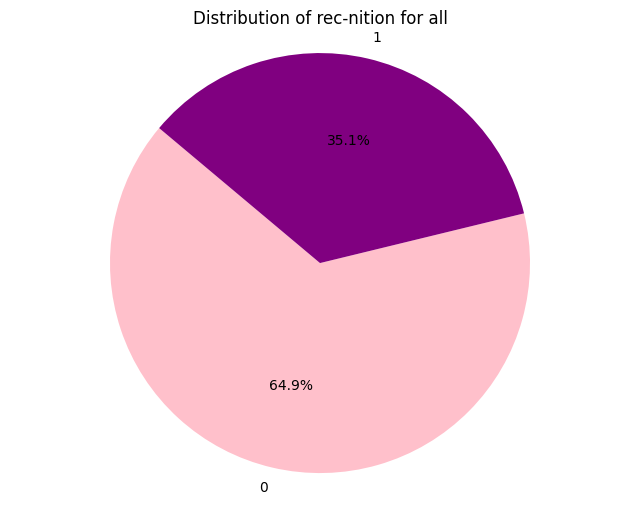

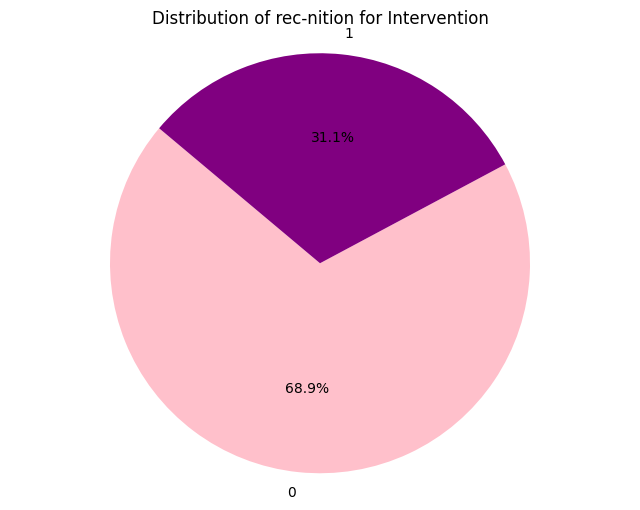

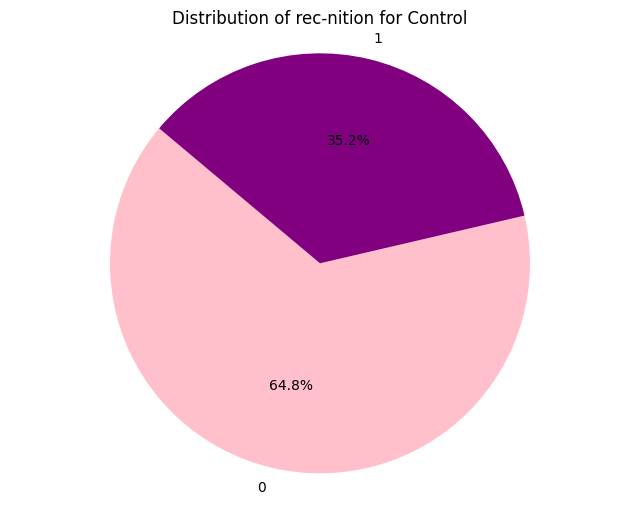

In [46]:
#pie charts of rec-nition (for all, for intervention, for control)

label_counts = reduced['rec-nition'].value_counts()

reduced_treat = reduced[reduced['intervention'] == 'yes']
label_counts_int = reduced_treat['rec-nition'].value_counts()

reduced_cont = reduced[reduced['intervention'] == 'no']
label_counts_cont = reduced_cont['rec-nition'].value_counts()



# Define a color map for emotion categories
color_map = {
    1: 'purple',
    0: 'pink'
}

# Plotting the pie chart for all
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts.index])
plt.title('Distribution of rec-nition for all')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Plotting the pie chart for intervention
plt.figure(figsize=(8, 6))
plt.pie(label_counts_int, labels=label_counts_int.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_int.index])
plt.title('Distribution of rec-nition for Intervention')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plotting the pie chart for control
plt.figure(figsize=(8, 6))
plt.pie(label_counts_cont, labels=label_counts_cont.index, autopct='%1.1f%%', startangle=140, colors=[color_map[label] for label in label_counts_cont.index])
plt.title('Distribution of rec-nition for Control')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
#on main_post_df: dist of n_comments and n_comments not na